In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


import copy
import cv2
from PIL import Image

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # 메모리 증가 설정
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)  # 메모리 설정은 프로그램 시작 전에 설정해야 합니다.
else:
    print("No GPU available")


1 Physical GPUs, 1 Logical GPUs


START

"0" 클래스는 [1, 0, 0]으로 인코딩

"1" 클래스는 [0, 1, 0]으로 인코딩

"2" 클래스는 [0, 0, 1]으로 인코딩

Train

In [3]:
import tensorflow as tf
import os
IMAGE_HEIGHT = 112
IMAGE_WIDTH = 112
batch_size = 32

# 이미지 파일을 읽고 레이블을 설정하는 함수
def load_and_preprocess_image(image_path, label):
    # 이미지 읽기
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    # 이미지 크기 조정 및 정규화
    img = tf.image.resize(img, [IMAGE_HEIGHT, IMAGE_WIDTH])
    img = tf.cast(img, tf.float32) / 255.0  # 이미지를 [0,1] 범위로 정규화
    return img, label

# 데이터 디렉토리 경로 설정
data_dir = "C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/class/AI2/DATA/progress/final_train"

# 클래스 레이블 설정
class_names = ["0", "1", "2"]

# 이미지 파일 경로와 레이블을 리스트에 저장
file_paths = []
labels = []

# 클래스 레이블에 따라 이미지 파일 경로 및 레이블 설정
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_path = os.path.join(class_dir, filename)
            file_paths.append(file_path)
            labels.append(i)  # 클래스 레이블 설정

# 클래스 수 계산
num_classes = len(class_names)

# 원-핫 인코딩 수행
labels_onehot = tf.one_hot(labels, num_classes)

# 데이터셋 생성
image_paths_ds = tf.data.Dataset.from_tensor_slices(file_paths)
labels_ds = tf.data.Dataset.from_tensor_slices(labels_onehot)

# 이미지 파일 경로와 레이블을 결합하여 데이터셋 생성
dataset = tf.data.Dataset.zip((image_paths_ds, labels_ds))

# 이미지를 읽고 전처리하는 함수 적용
dataset = dataset.map(load_and_preprocess_image)

# 데이터셋을 셔플 및 배치 설정
dataset = dataset.shuffle(buffer_size=len(file_paths))
dataset = dataset.batch(batch_size)

# 데이터셋 사용 예시
for image_batch, label_batch in dataset.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)

Image batch shape: (32, 112, 112, 3)
Label batch shape: (32, 3)


In [4]:
len(dataset)

338

In [ ]:
# import matplotlib.pyplot as plt

# # 데이터셋에서 하나의 배치를 가져오기
# for image_batch, label_batch in dataset.take(1):
#     # 이미지와 라벨 출력
#     for image, label in zip(image_batch, label_batch):
#         # 이미지 시각화
#         plt.figure()
#         plt.imshow(image.numpy())
#         plt.title(f"Label: {label.numpy()}")
#         plt.axis("off")
#         plt.show()

Validation

In [5]:
# 이미지 파일을 읽고 레이블을 설정하는 함수
def load_and_preprocess_image(image_path, label):
    # 이미지 읽기
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    # 이미지 크기 조정 및 정규화
    img = tf.image.resize(img, [IMAGE_HEIGHT, IMAGE_WIDTH])
    img = tf.cast(img, tf.float32) / 255.0  # 이미지를 [0,1] 범위로 정규화
    return img, label

# 데이터 디렉토리 경로 설정
data_dir = "C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/class/AI2/DATA/progress/final_validation"

# 클래스 레이블 설정
class_names = ["0", "1", "2"]

# 이미지 파일 경로와 레이블을 리스트에 저장
file_paths = []
labels = []

# 클래스 레이블에 따라 이미지 파일 경로 및 레이블 설정
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_path = os.path.join(class_dir, filename)
            file_paths.append(file_path)
            labels.append(i)  # 클래스 레이블 설정

# 클래스 수 계산
num_classes = len(class_names)

# 원-핫 인코딩 수행
labels_onehot = tf.one_hot(labels, num_classes)

# 데이터셋 생성
image_paths_ds = tf.data.Dataset.from_tensor_slices(file_paths)
labels_ds = tf.data.Dataset.from_tensor_slices(labels_onehot)

# 이미지 파일 경로와 레이블을 결합하여 데이터셋 생성
val_dataset = tf.data.Dataset.zip((image_paths_ds, labels_ds))

# 이미지를 읽고 전처리하는 함수 적용
val_dataset = val_dataset.map(load_and_preprocess_image)

# 데이터셋을 셔플 및 배치 설정
val_dataset = val_dataset.shuffle(buffer_size=len(file_paths))
val_dataset = val_dataset.batch(batch_size)

# 데이터셋 사용 예시
for image_batch, label_batch in val_dataset.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)

Image batch shape: (32, 112, 112, 3)
Label batch shape: (32, 3)


In [ ]:
# import matplotlib.pyplot as plt

# # 데이터셋에서 하나의 배치를 가져오기
# for image_batch, label_batch in val_dataset.take(1):
#     # 이미지와 라벨 출력
#     for image, label in zip(image_batch, label_batch):
#         # 이미지 시각화
#         plt.figure()
#         plt.imshow(image.numpy())
#         plt.title(f"Label: {label.numpy()}")
#         plt.axis("off")
#         plt.show()

Test

In [6]:
import tensorflow as tf
import os
IMAGE_HEIGHT = 112
IMAGE_WIDTH = 112
batch_size = 32

# 이미지 파일을 읽고 레이블을 설정하는 함수
def load_and_preprocess_image(image_path, label):
    # 이미지 읽기
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    # 이미지 크기 조정 및 정규화
    img = tf.image.resize(img, [IMAGE_HEIGHT, IMAGE_WIDTH])
    img = tf.cast(img, tf.float32) / 255.0  # 이미지를 [0,1] 범위로 정규화
    return img, label

# 데이터 디렉토리 경로 설정
data_dir = "C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/class/AI2/DATA/progress/final_test"

# 클래스 레이블 설정
class_names = ["0", "1", "2"]

# 이미지 파일 경로와 레이블을 리스트에 저장
file_paths = []
labels = []

# 클래스 레이블에 따라 이미지 파일 경로 및 레이블 설정
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_path = os.path.join(class_dir, filename)
            file_paths.append(file_path)
            labels.append(i)  # 클래스 레이블 설정

# 클래스 수 계산
num_classes = len(class_names)

# 원-핫 인코딩 수행
labels_onehot = tf.one_hot(labels, num_classes)

# 데이터셋 생성
image_paths_ds = tf.data.Dataset.from_tensor_slices(file_paths)
labels_ds = tf.data.Dataset.from_tensor_slices(labels_onehot)

# 이미지 파일 경로와 레이블을 결합하여 데이터셋 생성
test_dataset = tf.data.Dataset.zip((image_paths_ds, labels_ds))

# 이미지를 읽고 전처리하는 함수 적용
test_dataset = test_dataset.map(load_and_preprocess_image)

# 데이터셋을 셔플 및 배치 설정
test_dataset = test_dataset.shuffle(buffer_size=len(file_paths))
test_dataset = test_dataset.batch(batch_size)

# 데이터셋 사용 예시
for image_batch, label_batch in test_dataset.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)

Image batch shape: (32, 112, 112, 3)
Label batch shape: (32, 3)


In [ ]:
# import matplotlib.pyplot as plt

# # 데이터셋에서 하나의 배치를 가져오기
# for image_batch, label_batch in test_dataset.take(1):
#     # 이미지와 라벨 출력
#     for image, label in zip(image_batch, label_batch):
#         # 이미지 시각화
#         plt.figure()
#         plt.imshow(image.numpy())
#         plt.title(f"Label: {label.numpy()}")
#         plt.axis("off")
#         plt.show()

## MODEL - CAM, Grad-CAM

# RESNET-18

In [5]:
# import tensorflow as tf
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, BatchNormalization, ReLU, Add, Input, MaxPooling2D
# from tensorflow.keras.models import Model
# from tensorflow.keras.metrics import Recall, Precision
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# import torch
# import numpy as np

In [6]:
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(f"{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPUs")
#     except RuntimeError as e:
#         print(e)  # 메모리 설정은 프로그램 시작 전에 설정해야 합니다.
# else:
#     print("No GPU available")

In [7]:
# def load_torch_weights(model, weight_path):
#     state_dict = torch.load(weight_path)

#     def set_conv_weights(layer, weight, bias=None):
#         weight = weight.cpu().numpy()
#         weight = np.transpose(weight, (2, 3, 1, 0))
#         if bias is not None:
#             bias = bias.cpu().numpy()
#             layer.set_weights([weight, bias])
#         else:
#             layer.set_weights([weight])

#     def set_bn_weights(layer, weight, bias, bn_mean, bn_var):
#         weight = weight.cpu().numpy()
#         bias = bias.cpu().numpy()
#         bn_mean = bn_mean.cpu().numpy()
#         bn_var = bn_var.cpu().numpy()
#         layer.set_weights([weight, bias, bn_mean, bn_var])

#     layer_map = {
#         'conv1': 'conv2d',
#         'bn1': 'batch_normalization',
#         'layer1.0.conv1': 'conv2d_1',
#         'layer1.0.bn1': 'batch_normalization_1',
#         'layer1.0.conv2': 'conv2d_2',
#         'layer1.0.bn2': 'batch_normalization_2',
#         'layer1.1.conv1': 'conv2d_3',
#         'layer1.1.bn1': 'batch_normalization_3',
#         'layer1.1.conv2': 'conv2d_4',
#         'layer1.1.bn2': 'batch_normalization_4',
#         'layer2.0.conv1': 'conv2d_5',
#         'layer2.0.bn1': 'batch_normalization_5',
#         'layer2.0.conv2': 'conv2d_6',
#         'layer2.0.bn2': 'batch_normalization_6',
#         'layer2.0.downsample.0': 'conv2d_7',
#         'layer2.0.downsample.1': 'batch_normalization_7',
#         'layer2.1.conv1': 'conv2d_8',
#         'layer2.1.bn1': 'batch_normalization_8',
#         'layer2.1.conv2': 'conv2d_9',
#         'layer2.1.bn2': 'batch_normalization_9',
#         'layer3.0.conv1': 'conv2d_10',
#         'layer3.0.bn1': 'batch_normalization_10',
#         'layer3.0.conv2': 'conv2d_11',
#         'layer3.0.bn2': 'batch_normalization_11',
#         'layer3.0.downsample.0': 'conv2d_12',
#         'layer3.0.downsample.1': 'batch_normalization_12',
#         'layer3.1.conv1': 'conv2d_13',
#         'layer3.1.bn1': 'batch_normalization_13',
#         'layer3.1.conv2': 'conv2d_14',
#         'layer3.1.bn2': 'batch_normalization_14',
#         'layer4.0.conv1': 'conv2d_15',
#         'layer4.0.bn1': 'batch_normalization_15',
#         'layer4.0.conv2': 'conv2d_16',
#         'layer4.0.bn2': 'batch_normalization_16',
#         'layer4.0.downsample.0': 'conv2d_17',
#         'layer4.0.downsample.1': 'batch_normalization_17',
#         'layer4.1.conv1': 'conv2d_18',
#         'layer4.1.bn1': 'batch_normalization_18',
#         'layer4.1.conv2': 'conv2d_19',
#         'layer4.1.bn2': 'batch_normalization_19'
#     }

#     for layer in model.layers:
#         if isinstance(layer, Conv2D):
#             layer_name = layer_map.get(layer.name)
#             if layer_name is not None:
#                 weight = state_dict[layer_name + '.weight']
#                 bias = state_dict.get(layer_name + '.bias')
#                 set_conv_weights(layer, weight, bias)
#         elif isinstance(layer, BatchNormalization):
#             layer_name = layer_map.get(layer.name)
#             if layer_name is not None:
#                 weight = state_dict[layer_name + '.weight']
#                 bias = state_dict[layer_name + '.bias']
#                 bn_mean = state_dict[layer_name + '.running_mean']
#                 bn_var = state_dict[layer_name + '.running_var']
#                 set_bn_weights(layer, weight, bias, bn_mean, bn_var)

In [8]:
# def residual_block(x, filters, kernel_size=3, stride=1):
#     x_shortcut = x 
#     x = tf.keras.layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x) 
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.Conv2D(filters, kernel_size=kernel_size, padding='same')(x)
#     x = tf.keras.layers.BatchNormalization()(x)
    
#     # Shortcut path => x가 바로 이동
#     if stride != 1 or x.shape[-1] != filters:
#         x_shortcut = tf.keras.layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x_shortcut) 
#         x_shortcut = tf.keras.layers.BatchNormalization()(x_shortcut)
    
#     # Add the shortcut to the main path => shortcut경로와 주 경로 결합
#     x = tf.keras.layers.Add()([x, x_shortcut])
#     x = tf.keras.layers.Activation('relu')(x)
    
#     return x

In [9]:
# def build_resnet18(input_shape=(112, 112, 3), num_classes=1):
#     input_layer = tf.keras.layers.Input(shape=input_shape)
    
#     x = tf.keras.layers.Conv2D(8, kernel_size=7, strides=2, padding='same')(input_layer)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
    
#     x = residual_block(x, filters=8, stride=1)
#     x = residual_block(x, filters=8, stride=1)
    
#     x = residual_block(x, filters=16, stride=2)
#     x = residual_block(x, filters=16, stride=1)
    
#     x = residual_block(x, filters=32, stride=2)
#     x = residual_block(x, filters=32, stride=1)
    
#     x = residual_block(x, filters=64, stride=2)
#     x = residual_block(x, filters=64, stride=1)
    
#     # Global Average Pooling을 사용하여 출력 크기 조정
#     x = tf.keras.layers.GlobalAveragePooling2D()(x)
    
#     # 분류를 위한 Fully Connected Layer
#     x = tf.keras.layers.Dense(3, activation='sigmoid')(x)
    
#     # 모델 생성
#     model = tf.keras.models.Model(inputs=input_layer, outputs=x)
    
#     return model

In [10]:
# model_with_cam = build_resnet18()

In [11]:
# load_torch_weights(model_with_cam, 'resnet18.pth')

In [12]:
# # 모델 컴파일
# model_with_cam.compile(
#     loss='categorical_crossentropy',
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
#     metrics=['accuracy', Recall(), Precision()],
# )

In [13]:
# # 콜백 설정
# early_stopping_callback = EarlyStopping(
#     monitor='val_loss',
#     patience=20,
#     restore_best_weights=True 
# )

In [14]:
# checkpoint_callback = ModelCheckpoint(
#     filepath='C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/수업/AI융합캡스톤디자인2/DATA/best_model.h5',
#     monitor='val_accuracy',   
#     save_best_only=True,      
#     save_weights_only=False,   
#     verbose=1                  
# )

In [15]:
# import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [16]:
# history_cam_model = model_with_cam.fit(
#       dataset,
#       epochs=100,
#       validation_data=val_dataset,
#       verbose=1,
#       use_multiprocessing=True,
#       callbacks=[checkpoint_callback]
# )

In [17]:
# # pytorch
# import torch
# import torchvision
# from torchvision import transforms, datasets, models
# from torchsummary import summary

# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim

In [18]:
# device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [19]:
# resnet_pt = models.resnet18(pretrained=True)
# # freezing
# for param in resnet_pt.parameters():
#     param.requires_grad = False

# # fc layer 수정
# fc_in_features = resnet_pt.fc.in_features
# resnet_pt.fc = nn.Linear(fc_in_features, 3)
# resnet_pt = resnet_pt.to(device)

In [20]:
# from torchsummary import summary

# # 모델을 CPU로 이동
# resnet_pt.to('cpu')

# # 모델 요약
# summary(resnet_pt, (3, 112, 112), device="cpu")

In [21]:
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(resnet_pt.parameters(), lr=0.001,
#                       momentum=0.9)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)


In [22]:
# # Training
# def train(epoch, model, criterion, optimizer):
#     model.train()
#     train_loss = 0
#     correct = 0
#     total = 0
#     for batch_idx, (inputs, labels) in enumerate(trainloader):
#         inputs, labels = inputs.to(device), labels.to(device)
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         train_loss += loss.item()*inputs.size(0)
#         _, predicted = outputs.max(1)
#         total += labels.size(0)
#         correct += predicted.eq(labels).sum().item()
    
#     epoch_loss = train_loss/total
#     epoch_acc = correct/total*100
#     print("Train | Loss:%.4f Acc: %.2f%% (%s/%s)" 
#         % (epoch_loss, epoch_acc, correct, total))
#     return epoch_loss, epoch_acc

# def test(epoch, model, criterion, optimizer):
#     model.eval()
#     test_loss = 0
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for batch_idx, (inputs, labels) in enumerate(testloader):
#             inputs, labels = inputs.to(device), labels.to(device)
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)

#             test_loss += loss.item()*inputs.size(0)
#             _, predicted = outputs.max(1)
#             total += labels.size(0)
#             correct += predicted.eq(labels).sum().item()
        
#         epoch_loss = test_loss/total
#         epoch_acc = correct/total*100
#         print("Test | Loss:%.4f Acc: %.2f%% (%s/%s)" 
#             % (epoch_loss, epoch_acc, correct, total))
#     return epoch_loss, epoch_acc

In [23]:
# start_time = time.time()
# best_acc = 0
# epoch_length = 100
# save_loss = {"train":[],
#              "test":[]}
# save_acc = {"train":[],
#              "test":[]}
# for epoch in range(epoch_length):
#     print("Epoch %s" % epoch)
#     train_loss, train_acc = train(epoch, resnet_pt, criterion, optimizer)
#     save_loss['train'].append(train_loss)
#     save_acc['train'].append(train_acc)

#     test_loss, test_acc = test(epoch, resnet_pt, criterion, optimizer)
#     save_loss['test'].append(test_loss)
#     save_acc['test'].append(test_acc)

#     scheduler.step()

#     # Save model
#     if test_acc > best_acc:
#         best_acc = test_acc
#         best_model_wts = copy.deepcopy(resnet_pt.state_dict())
#     resnet_pt.load_state_dict(best_model_wts)

# learning_time = time.time() - start_time
# print(f'**Learning time: {learning_time // 60:.0f}m {learning_time % 60:.0f}s')

In [24]:
# # load resnet18 with the pre-trained weights
# from torchvision import models
# import torch

# resnet18_pretrained = models.resnet18(pretrained=True)

# print(resnet18_pretrained)

In [25]:
# import torch.nn as nn
# # change the output layer to 3 classes
# num_classes = 3
# num_ftrs = resnet18_pretrained.fc.in_features
# resnet18_pretrained.fc = nn.Linear(num_ftrs, num_classes)

# device = torch.device('cuda:0')
# resnet18_pretrained.to(device)

In [26]:
# # get the model summary
# from torchsummary import summary
# summary(resnet18_pretrained, input_size=(3, 112, 112), device=device.type)

In [27]:
# def residual_block(x, filters, kernel_size=3, stride=1):
#     x_shortcut = x 
#     x = tf.keras.layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x) 
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.Conv2D(filters, kernel_size=kernel_size, padding='same')(x)
#     x = tf.keras.layers.BatchNormalization()(x)
    
#     # Shortcut path => x가 바로 이동
#     if stride != 1 or x.shape[-1] != filters:
#         x_shortcut = tf.keras.layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x_shortcut) 
#         x_shortcut = tf.keras.layers.BatchNormalization()(x_shortcut)
    
#     # Add the shortcut to the main path => shortcut경로와 주 경로 결합
#     x = tf.keras.layers.Add()([x, x_shortcut])
#     x = tf.keras.layers.Activation('relu')(x)
    
#     return x

In [28]:
# def build_resnet18(input_shape=(224, 224, 3), num_classes=1):
#     input_layer = tf.keras.layers.Input(shape=input_shape)
    
#     x = tf.keras.layers.Conv2D(8, kernel_size=7, strides=2, padding='same')(input_layer)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
    
#     x = residual_block(x, filters=8, stride=1)
#     x = residual_block(x, filters=8, stride=1)
    
#     x = residual_block(x, filters=16, stride=2)
#     x = residual_block(x, filters=16, stride=1)
    
#     x = residual_block(x, filters=32, stride=2)
#     x = residual_block(x, filters=32, stride=1)
    
#     x = residual_block(x, filters=64, stride=2)
#     x = residual_block(x, filters=64, stride=1)
    
#     # Global Average Pooling을 사용하여 출력 크기 조정
#     x = tf.keras.layers.GlobalAveragePooling2D()(x)
    
#     # 분류를 위한 Fully Connected Layer
#     x = tf.keras.layers.Dense(num_classes, activation='sigmoid')(x)
    
#     # 모델 생성
#     model = tf.keras.models.Model(inputs=input_layer, outputs=x)
    
#     return model

In [29]:
# model_with_cam = build_resnet18()
# model_with_cam.summary()

In [30]:
# load_torch_weights(model_with_cam, 'resnet18.pth')

In [7]:

def build_pretrained_resnet50(input_shape=(112, 112, 3), num_classes=3):
    # 사전 훈련된 ResNet-50 모델 로드, 최상위 층(Fully Connected layer)은 제외
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # 모델 아키텍처 커스터마이즈
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)  # 평균 풀링 층 추가
    x = tf.keras.layers.Dense(num_classes, activation='softmax')(x)  # 새로운 Fully Connected 층 추가

    # 입력부터 새로운 출력층까지 연결한 전체 모델 생성
    model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

    # 사전 훈련된 가중치를 그대로 사용하면서 새로 추가한 층만 학습하도록 설정
    for layer in base_model.layers:
        layer.trainable = False

    return model

# 모델 생성
cam_model = build_pretrained_resnet50()

In [8]:
cam_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 118, 118, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 56, 56, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 56, 56, 64)   256         ['conv1_conv[0][0]']         

In [42]:
# # load resnet18 with the pre-trained weights
# from torchvision import models
# import torch

# resnet18_pretrained = models.resnet18(pretrained=True)

# print(resnet18_pretrained)

In [ ]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# import torch.nn as nn

# num_ftrs = resnet18_pretrained.fc.in_features # fc의 입력 노드 수를 산출 (512개)
# resnet18_pretrained.fc = nn.Linear(num_ftrs, 3) # fc를 nn.Linear(num_ftrs, 10)로 대체
# model = resnet18_pretrained.to(device)

# print(model)

In [ ]:
# def residual_block(x, filters, kernel_size=3, stride=1):
#     x_shortcut = x 
#     x = tf.keras.layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x) 
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.Conv2D(filters, kernel_size=kernel_size, padding='same')(x)
#     x = tf.keras.layers.BatchNormalization()(x)
    
#     # Shortcut path => x가 바로 이동
#     if stride != 1 or x.shape[-1] != filters:
#         x_shortcut = tf.keras.layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x_shortcut) 
#         x_shortcut = tf.keras.layers.BatchNormalization()(x_shortcut)
    
#     # Add the shortcut to the main path => shortcut경로와 주 경로 결합
#     x = tf.keras.layers.Add()([x, x_shortcut])
#     x = tf.keras.layers.Activation('relu')(x)
    
#     return x

In [ ]:
# def build_resnet18(input_shape=(224, 224, 3), num_classes=1):
#     input_layer = tf.keras.layers.Input(shape=input_shape)
    
#     x = tf.keras.layers.Conv2D(8, kernel_size=7, strides=2, padding='same')(input_layer)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
    
#     x = residual_block(x, filters=8, stride=1)
#     x = residual_block(x, filters=8, stride=1)
    
#     x = residual_block(x, filters=16, stride=2)
#     x = residual_block(x, filters=16, stride=1)
    
#     x = residual_block(x, filters=32, stride=2)
#     x = residual_block(x, filters=32, stride=1)
    
#     x = residual_block(x, filters=64, stride=2)
#     x = residual_block(x, filters=64, stride=1)
    
#     # Global Average Pooling을 사용하여 출력 크기 조정
#     x = tf.keras.layers.GlobalAveragePooling2D()(x)
    
#     # 분류를 위한 Fully Connected Layer
#     x = tf.keras.layers.Dense(num_classes, activation='sigmoid')(x)
    
#     # 모델 생성
#     model = tf.keras.models.Model(inputs=input_layer, outputs=x)
    
#     return model

In [ ]:
# model_with_cam = build_resnet18()
# model_with_cam.summary()

In [9]:
with tf.device('/GPU:0'):
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

    cam_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
        loss='categorical_crossentropy',
        metrics=METRICS
    )

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/class/AI2/DATA/progress/preprocessing_pretrained_best_model_again.h5',  # 가중치를 저장할 파일 경로
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

with tf.device('/GPU:0'):
  history_cam_model = cam_model.fit(
      dataset,
      epochs=100,
      validation_data=val_dataset,
      verbose=1,
      use_multiprocessing=True,
      callbacks=[checkpoint_callback]
)

Epoch 1/100
338/338 [==============================] - ETA: 0s - loss: 0.9560 - accuracy: 0.5362 - precision: 0.7751 - recall: 0.1765
Epoch 1: val_accuracy improved from -inf to 0.50306, saving model to C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/class/AI2/DATA/progress\preprocessing_pretrained_best_model_again.h5
338/338 [==============================] - 53s 64ms/step - loss: 0.9560 - accuracy: 0.5362 - precision: 0.7751 - recall: 0.1765 - val_loss: 0.9831 - val_accuracy: 0.5031 - val_precision: 0.6542 - val_recall: 0.2192
Epoch 2/100
337/338 [============================>.] - ETA: 0s - loss: 0.8293 - accuracy: 0.6047 - precision: 0.7448 - recall: 0.3737
Epoch 2: val_accuracy improved from 0.50306 to 0.52611, saving model to C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/class/AI2/DATA/progress\preprocessing_pretrained_best_model_again.h5
338/338 [==============================] - 25s 54ms/step - loss: 0.8293 - accuracy: 0.6048 - precision: 0.7448 - recall: 0.3735 - val_loss: 0.9600 - val_accur

In [11]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

# 1단계: 저장된 모델 불러오기
loaded_model = tf.keras.models.load_model('C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/class/AI2/DATA/progress/preprocessing_pretrained_best_model_again.h5')

# 2단계: 콜백 정의
checkpoint_callback = ModelCheckpoint(
    filepath='C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/class/AI2/DATA/progress/preprocessing_pretrained_best_model_again2.h5',  # 추가 학습 후 가중치를 저장할 파일 경로
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# 3단계: 추가 학습 진행
with tf.device('/GPU:0'):
    history_cam_model = loaded_model.fit(
        dataset,  # 훈련 데이터
        epochs=100,  # 추가 학습할 에폭 수
        validation_data=val_dataset,  # 검증 데이터
        verbose=1,
        use_multiprocessing=True,
        callbacks=[checkpoint_callback]
    )

Epoch 1/100
338/338 [==============================] - ETA: 0s - loss: 0.5338 - accuracy: 0.7458 - precision: 0.7698 - recall: 0.7063
Epoch 1: val_accuracy improved from -inf to 0.68194, saving model to C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/class/AI2/DATA/progress\preprocessing_pretrained_best_model_again2.h5
338/338 [==============================] - 27s 57ms/step - loss: 0.5338 - accuracy: 0.7458 - precision: 0.7698 - recall: 0.7063 - val_loss: 0.6954 - val_accuracy: 0.6819 - val_precision: 0.7175 - val_recall: 0.6094
Epoch 2/100
337/338 [============================>.] - ETA: 0s - loss: 0.5308 - accuracy: 0.7483 - precision: 0.7711 - recall: 0.7047
Epoch 2: val_accuracy did not improve from 0.68194
338/338 [==============================] - 23s 51ms/step - loss: 0.5307 - accuracy: 0.7484 - precision: 0.7711 - recall: 0.7047 - val_loss: 0.6985 - val_accuracy: 0.6742 - val_precision: 0.7005 - val_recall: 0.6133
Epoch 3/100
337/338 [============================>.] - ETA: 0s - loss: 0

In [12]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

# 1단계: 저장된 모델 불러오기
loaded_model = tf.keras.models.load_model('C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/class/AI2/DATA/progress/preprocessing_pretrained_best_model_again2.h5')

# 2단계: 콜백 정의
checkpoint_callback = ModelCheckpoint(
    filepath='C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/class/AI2/DATA/progress/preprocessing_pretrained_best_model_again3.h5',  # 추가 학습 후 가중치를 저장할 파일 경로
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# 3단계: 추가 학습 진행
with tf.device('/GPU:0'):
    history_cam_model = loaded_model.fit(
        dataset,  # 훈련 데이터
        epochs=100,  # 추가 학습할 에폭 수
        validation_data=val_dataset,  # 검증 데이터
        verbose=1,
        use_multiprocessing=True,
        callbacks=[checkpoint_callback]
    )

Epoch 1/100
337/338 [============================>.] - ETA: 0s - loss: 0.4956 - accuracy: 0.7623 - precision: 0.7800 - recall: 0.7303
Epoch 1: val_accuracy improved from -inf to 0.69694, saving model to C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/class/AI2/DATA/progress\preprocessing_pretrained_best_model_again3.h5
338/338 [==============================] - 25s 54ms/step - loss: 0.4956 - accuracy: 0.7624 - precision: 0.7801 - recall: 0.7305 - val_loss: 0.6671 - val_accuracy: 0.6969 - val_precision: 0.7204 - val_recall: 0.6483
Epoch 2/100
337/338 [============================>.] - ETA: 0s - loss: 0.4953 - accuracy: 0.7647 - precision: 0.7829 - recall: 0.7372
Epoch 2: val_accuracy did not improve from 0.69694
338/338 [==============================] - 22s 50ms/step - loss: 0.4953 - accuracy: 0.7648 - precision: 0.7829 - recall: 0.7372 - val_loss: 0.6715 - val_accuracy: 0.6956 - val_precision: 0.7249 - val_recall: 0.6347
Epoch 3/100
337/338 [============================>.] - ETA: 0s - loss: 0

In [13]:
import os

cam_model_path = 'C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/class/AI2/DATA/progress/preprocessing_pretrained_best_model_again3.h5'

cam_model.save(cam_model_path)

# 저장된 경로 출력
print(f'Model saved at: {cam_model_path}')

Model saved at: C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/class/AI2/DATA/progress/preprocessing_pretrained_best_model_again3.h5


In [14]:
loss, accuracy, precision, recall = cam_model.evaluate(test_dataset)

113/113 [==============================] - 6s 34ms/step - loss: 0.6111 - accuracy: 0.6861 - precision: 0.7123 - recall: 0.6383


## CAM

In [15]:
def get_one(ds):
    # 데이터셋에서 하나의 샘플 가져오기
    sample = next(iter(ds.take(1)))
    image = sample[0]  # 이미지
    label = sample[1]  # 레이블
    return image, label  # 이미지와 레이블 반환

Label: tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)


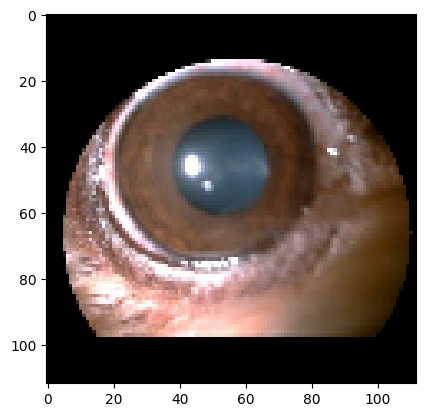

In [16]:
# 샘플 가져오기
image, label = get_one(test_dataset)

# 이미지의 배치 차원 제거하여 단일 이미지로 변환
image = image[0]  # 배치에서 첫 번째 이미지 선택
label = label[0]  # 배치에서 첫 번째 레이블 선택

print("Label:", label)
plt.imshow(image.numpy())
plt.show()

In [17]:
import os
cam_model_path = 'C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/class/AI2/DATA/progress/preprocessing_pretrained_best_model_again3.h5'
cam_model_predict = tf.keras.models.load_model(cam_model_path)

cam_model_predict.compile(
    loss='categorical_crossentropy', ## 변환해야함 -> sparse_categorical_crossentropy
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=METRICS,
)

In [18]:
import cv2
import numpy as np

# 이미지를 numpy 배열로 변환
image_np = image.numpy()
input_image = cv2.resize(image_np, (112, 112))
input_image = np.expand_dims(input_image, axis=0)
      
# 모델 예측
predictions = cam_model_predict.predict(input_image)
      
# 결과 출력
print(predictions)

predicted_class = np.argmax(predictions)



1/1 [==============================] - 1s 1s/step
[[6.4920780e-05 3.2432792e-01 6.7560714e-01]]


In [19]:
# def normalize_and_resize_img(input):
#     # Normalizes images: `uint8` -> `float32`
#     image = tf.image.resize(input['image'], [224, 224])
#     input['image'] = tf.cast(image, tf.float32) / 255.
#     return input['image'], input['label']

In [20]:
# import os
# cam_model_path = 'C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/수업/AI융합캡스톤디자인2/DATA/best_model.h5'
# cam_model = tf.keras.models.load_model(cam_model_path)

In [21]:
def generate_cam(model, image, label):
    # item = copy.deepcopy(item)
    # width = item['image'].shape[1]
    # height = item['image'].shape[0]
    
    # img_tensor, class_idx = normalize_and_resize_img(item) # 입력 이미지를 정규화하고 크기를 조정
    
    # 학습한 모델에서 원하는 Layer의 output을 얻기 위해서 모델의 input과 output을 새롭게 정의해줍니다.
    cam_model = tf.keras.models.Model([model.inputs], [model.layers[-3].output, model.output]) 
    # model.layers[-3] => 우리가 필요로 하는 GAP 이전 Convolution layer의 output을 얻을 수 있기 때문
    # 원본 모델에서 마지막에서 세 번째 레이어의 출력과 원본 모델의 출력을 동시에 반환
    conv_outputs, predictions = cam_model(tf.expand_dims(image, 0))
    # 새로 정의한 모델에 이미지를 전달하여 해당 이미지의 특성 맵 (conv_outputs)과 모델의 예측 결과 (predictions)을 얻기
    conv_outputs = conv_outputs[0, :, :, :] # 특성 맵의 형태를 조정
    
    # 모델의 weight activation은 마지막 layer에 있습니다.
    class_weights = model.layers[-1].get_weights()[0] 
    # 모델의 마지막 레이어에서 클래스 가중치를 가져오기

    cam_image = np.zeros(dtype=np.float32, shape=conv_outputs.shape[0:2])
    # CAM을 저장할 빈 이미지를 생성
    # for i, w in enumerate(class_weights[:, label]): # 각 클래스 가중치에 대해 반복
    #     # conv_outputs의 i번째 채널과 i번째 weight를 곱해서 누적하면 활성화된 정도가 나타날 겁니다.
    #     cam_image += w * conv_outputs[:, :, i]
    #     # 특성 맵의 각 채널에 대해 해당 채널의 클래스 가중치와 곱한 값을 누적하여 CAM을 생성
    for i, w in enumerate(class_weights[label]): # 각 클래스 가중치에 대해 반복
      # conv_outputs의 i번째 채널과 i번째 weight를 곱해서 누적하면 활성화된 정도가 나타날 겁니다.
      cam_image += w * conv_outputs[:, :, i]
      # 특성 맵의 각 채널에 대해 해당 채널의 클래스 가중치와 곱한 값을 누적하여 CAM을 생성

    cam_image /= np.max(cam_image) # activation score를 normalize합니다.
    # CAM을 정규화
    cam_image = cam_image.numpy() # NumPy 배열로 변환
    cam_image = cv2.resize(cam_image, (224, 224)) # 원래 이미지의 크기로 resize합니다.
    return cam_image

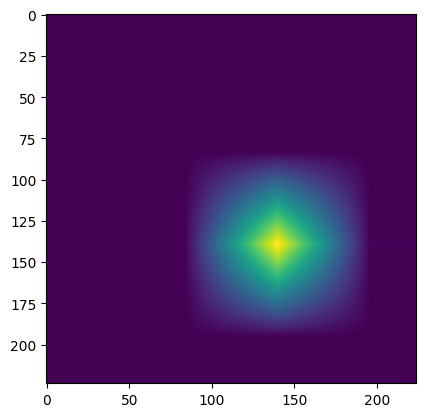

In [22]:
import numpy as np
import cv2

cam_image = generate_cam(cam_model, image, label=predicted_class)
plt.imshow(cam_image)
plt.show()

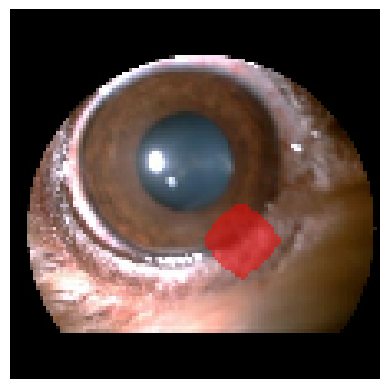

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 원본 이미지를 NumPy 배열로 변환하고, 0~1 사이의 값으로 정규화
original_image = image.numpy()
if np.max(original_image) > 1:
    original_image = original_image / 255.0

# CAM 이미지를 원본 이미지와 동일한 크기로 조정
cam_image_resized = cv2.resize(cam_image, (original_image.shape[1], original_image.shape[0]))

# CAM 이미지를 히트맵으로 변환
cam_image_normalized = (cam_image_resized - np.min(cam_image_resized)) / (np.max(cam_image_resized) - np.min(cam_image_resized))

# 히트맵의 특정 임계값 이상인 부분만 강조
threshold = 0.6  # 임계값 설정 (0과 1 사이)
mask = cam_image_normalized >= threshold

# 빨간색 히트맵 적용
highlighted_heatmap = np.zeros_like(original_image)
highlighted_heatmap[mask] = [1, 0, 0]  # 빨간색 (RGB)

# 원본 이미지에 히트맵 적용
superimposed_img = original_image.copy()
superimposed_img[mask] = 0.5 * original_image[mask] + 0.5 * highlighted_heatmap[mask]

# 최종 이미지 출력
plt.imshow(np.uint8(superimposed_img * 255))
plt.axis('off')  # 축 숨기기
plt.show()


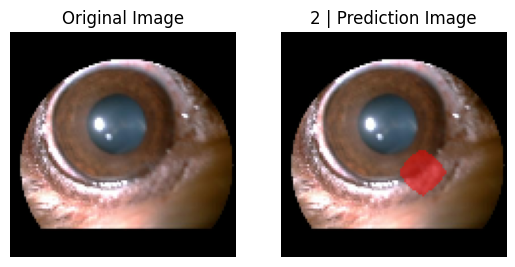

In [24]:
# 왼쪽 subplot: 원본 이미지
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# 오른쪽 subplot: 합쳐진 이미지
plt.subplot(1, 2, 2)
plt.imshow(superimposed_img)
if predicted_class == 0:
    title = '0'
elif predicted_class == 1:
    title = '1'
elif predicted_class == 2:
    title = '2'
else:
    title = 'Unknown'
plt.title(f'{title} | Prediction Image')
plt.axis('off')

# 출력
plt.show()